In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [29]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import the requests library.
import requests

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [30]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [31]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [34]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 10 of Set 25 | havoysund
Processing Record 11 of Set 25 | wajir
Processing Record 12 of Set 25 | kemi
Processing Record 13 of Set 25 | kruisfontein
Processing Record 14 of Set 25 | faanui
Processing Record 15 of Set 25 | saleaula
City not found. Skipping...
Processing Record 16 of Set 25 | jamestown
Processing Record 17 of Set 25 | nome
Processing Record 18 of Set 25 | new norfolk
Processing Record 19 of Set 25 | ola
Processing Record 20 of Set 25 | hilo
Processing Record 21 of Set 25 | kodiak
Processing Record 22 of Set 25 | ilulissat
Processing Record 23 of Set 25 | severo-kurilsk
Processing Record 24 of Set 25 | ushuaia
Processing Record 25 of Set 25 | macheng
Processing Record 26 of Set 25 | arraial do cabo
Processing Record 27 of Set 25 | punta arenas
Processing Record 28 of Set 25 | baie-comeau
Processing Record 29 of Set 25 | ust-maya
Processing Record 30 of Set 25 | cape town
Processing Record 31 of Set 25 | cayenne
Processing Record 32 of Set 25 | hithadhoo
P

Processing Record 36 of Set 28 | viedma
Processing Record 37 of Set 28 | suntar
Processing Record 38 of Set 28 | dalvik
Processing Record 39 of Set 28 | nikolskoye
Processing Record 40 of Set 28 | asmar
Processing Record 41 of Set 28 | sanchor
Processing Record 42 of Set 28 | coquimbo
Processing Record 43 of Set 28 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 28 | minbu
Processing Record 45 of Set 28 | meulaboh
Processing Record 46 of Set 28 | lobva
Processing Record 47 of Set 28 | lujan
Processing Record 48 of Set 28 | te anau
Processing Record 49 of Set 28 | hervey bay
Processing Record 50 of Set 28 | ruatoria
City not found. Skipping...
Processing Record 1 of Set 29 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 29 | aklavik
Processing Record 3 of Set 29 | kapuskasing
Processing Record 4 of Set 29 | mehamn
Processing Record 5 of Set 29 | nouadhibou
Processing Record 6 of Set 29 | nanortalik
Processing Record 7 of Set 29 | guadalupe vic

Processing Record 26 of Set 32 | saint-georges
Processing Record 27 of Set 32 | harnosand
Processing Record 28 of Set 32 | ancud
Processing Record 29 of Set 32 | penzance
Processing Record 30 of Set 32 | karamea
City not found. Skipping...
Processing Record 31 of Set 32 | nanchong
Processing Record 32 of Set 32 | chuy
Processing Record 33 of Set 32 | sao miguel do araguaia
Processing Record 34 of Set 32 | kiama
Processing Record 35 of Set 32 | biloela
Processing Record 36 of Set 32 | calabozo
Processing Record 37 of Set 32 | olafsvik
Processing Record 38 of Set 32 | fort-shevchenko
Processing Record 39 of Set 32 | mayo
Processing Record 40 of Set 32 | flin flon
Processing Record 41 of Set 32 | catamarca
Processing Record 42 of Set 32 | kalmar
Processing Record 43 of Set 32 | san jose
Processing Record 44 of Set 32 | huarmey
Processing Record 45 of Set 32 | mount isa
Processing Record 46 of Set 32 | blackfoot
Processing Record 47 of Set 32 | ventspils
Processing Record 48 of Set 32 | ma

Processing Record 11 of Set 36 | inirida
Processing Record 12 of Set 36 | warangal
Processing Record 13 of Set 36 | burnie
Processing Record 14 of Set 36 | sinkat
City not found. Skipping...
Processing Record 15 of Set 36 | kieta
Processing Record 16 of Set 36 | kenai
Processing Record 17 of Set 36 | golovchino
Processing Record 18 of Set 36 | weinan
Processing Record 19 of Set 36 | kiruna
Processing Record 20 of Set 36 | port blair
Processing Record 21 of Set 36 | estevan
Processing Record 22 of Set 36 | acapulco
Processing Record 23 of Set 36 | bathsheba
Processing Record 24 of Set 36 | bose
Processing Record 25 of Set 36 | kailua
Processing Record 26 of Set 36 | tinskoy
Processing Record 27 of Set 36 | yaan
Processing Record 28 of Set 36 | nam tha
City not found. Skipping...
Processing Record 29 of Set 36 | husavik
Processing Record 30 of Set 36 | deniliquin
Processing Record 31 of Set 36 | sipoo
Processing Record 32 of Set 36 | pochutla
Processing Record 33 of Set 36 | joshimath
Pr

In [37]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Diego De Almagro,-26.37,-70.05,44.73,68,0,0.43,CL,2020-08-15 23:36:38
1,Havoysund,71.00,24.66,44.60,81,99,26.40,NO,2020-08-15 23:38:20
2,Wajir,1.75,40.06,72.27,63,100,13.89,KE,2020-08-15 23:38:20
3,Kemi,65.86,24.82,59.00,51,42,10.29,FI,2020-08-15 23:38:21
4,Kruisfontein,-34.00,24.73,48.00,73,19,4.00,ZA,2020-08-15 23:38:21
5,Faanui,-16.48,-151.75,78.30,80,82,14.70,PF,2020-08-15 23:38:21
6,Jamestown,42.10,-79.24,77.00,64,1,5.82,US,2020-08-15 23:35:12
7,Nome,64.50,-165.41,64.99,93,90,9.17,US,2020-08-15 23:38:21
8,New Norfolk,-42.78,147.06,53.01,93,100,3.62,AU,2020-08-15 23:38:21
9,Ola,59.58,151.28,59.47,64,83,3.36,RU,2020-08-15 23:38:21


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

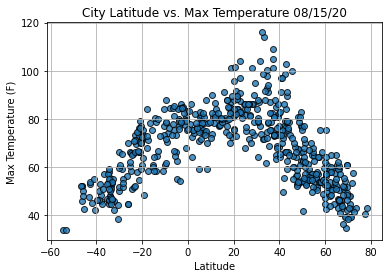

In [41]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

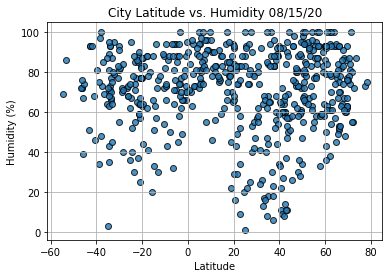

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

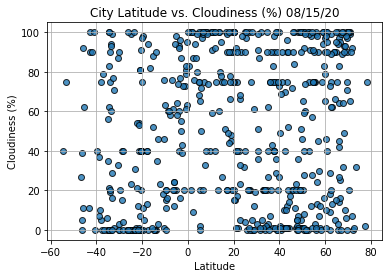

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

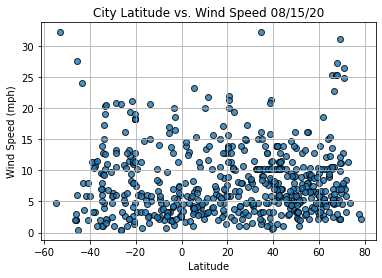

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()